In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import ob

In [2]:
m12i_data = pd.read_hdf('Alignment_z/data_lmcAlignment_z_m12i_res7100.h5')
m12f_data = pd.read_hdf('Alignment_z/data_lmcAlignment_z_m12f_res7100.h5')
m12w_data = pd.read_hdf('Alignment_z/data_lmcAlignment_z_m12w_res7100.h5')
m12m_data = pd.read_hdf('Alignment_z/data_lmcAlignment_z_m12m_res7100.h5')

In [3]:
vfunc = np.vectorize(ob.cvtSnapshot)
pl.rcParams['font.family'] = 'serif'
pericenter = pd.read_hdf('data_pericenters.h5')

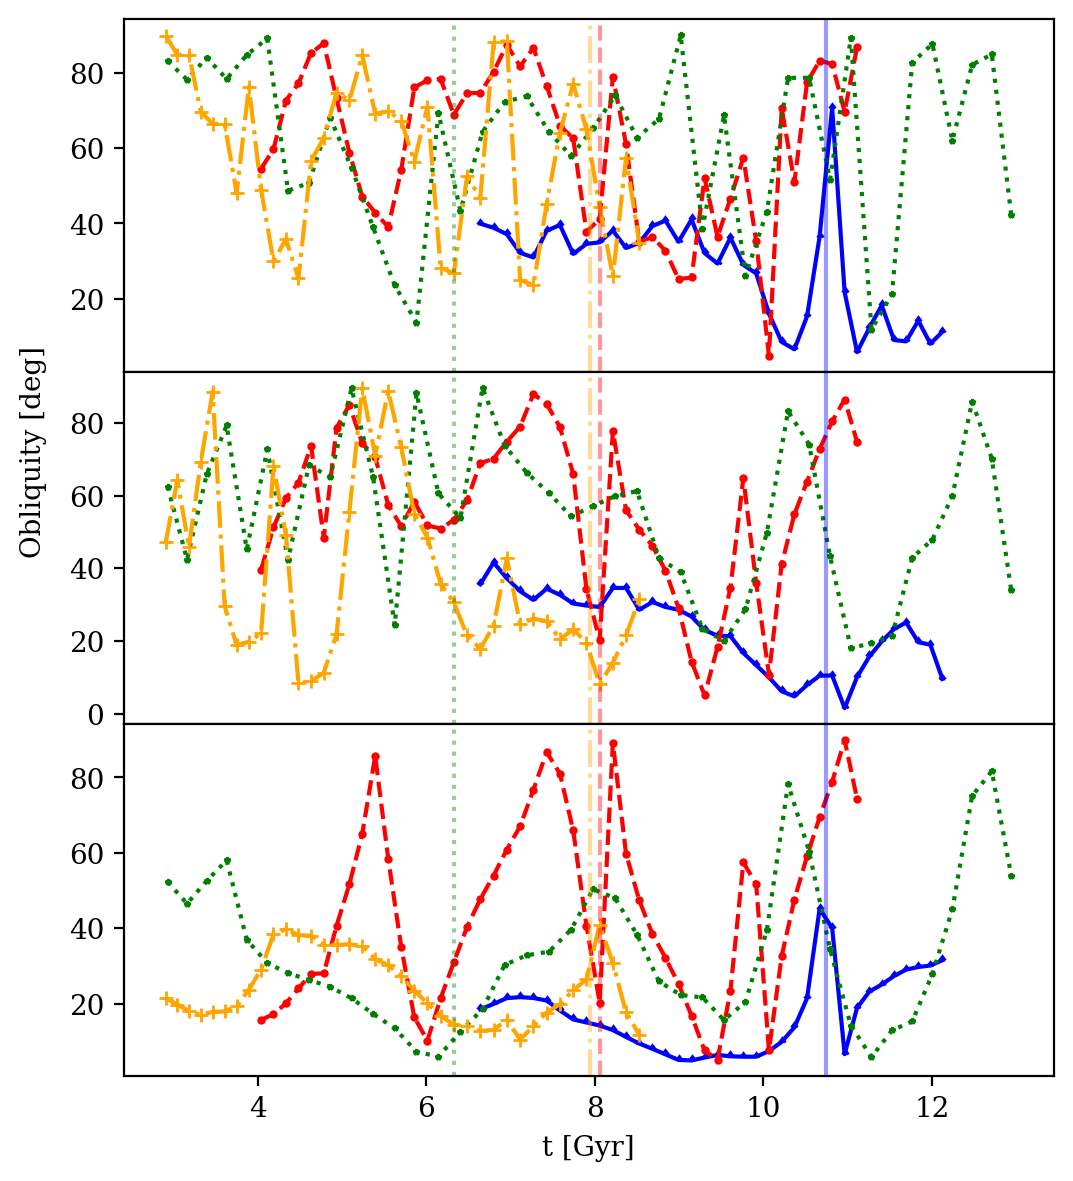

In [4]:
fig, axs = pl.subplots(3, dpi=200, sharex=True, figsize=(6,7))

(rs90, rs90_5, r_vir) = axs

domain = np.arange(0, 13)

rs90.plot(vfunc(m12f_data['snapshot']), m12f_data['disk'], ms=2, c='blue', marker=10, label='m12f')
rs90.plot(vfunc(m12i_data['snapshot']), m12i_data['disk'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
rs90.plot(vfunc(m12m_data['snapshot']), m12m_data['disk'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
rs90.plot(vfunc(m12w_data['snapshot']), m12w_data['disk'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

rs90_5.plot(vfunc(m12f_data['snapshot']), m12f_data['5.disk'], ms=2, c='blue', marker=10, label='m12f')
rs90_5.plot(vfunc(m12i_data['snapshot']), m12i_data['5.disk'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
rs90_5.plot(vfunc(m12m_data['snapshot']), m12m_data['5.disk'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
rs90_5.plot(vfunc(m12w_data['snapshot']), m12w_data['5.disk'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

r_vir.plot(vfunc(m12f_data['snapshot']), m12f_data['virial'], ms=2, c='blue', marker=10, label='m12f')
r_vir.plot(vfunc(m12i_data['snapshot']), m12i_data['virial'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
r_vir.plot(vfunc(m12m_data['snapshot']), m12m_data['virial'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
r_vir.plot(vfunc(m12w_data['snapshot']), m12w_data['virial'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

r_vir.set_xlabel('t [Gyr]')
fig.text(0.05, .5, 'Obliquity [deg]', ha = 'center', rotation = 90)

for ax in axs:
    ax.axvline(pericenter['m12f']['peri.t'], alpha=.4, c='blue')
    ax.axvline(pericenter['m12i']['peri.t'], alpha=.4, c='red', ls='dashed')
    ax.axvline(pericenter['m12m']['peri.t'], alpha=.4, c='green', ls='dotted')
    ax.axvline(pericenter['m12w']['peri.t'], alpha=.4, c='orange', ls='dashdot')

fig.subplots_adjust(hspace = 0)
pl.show()

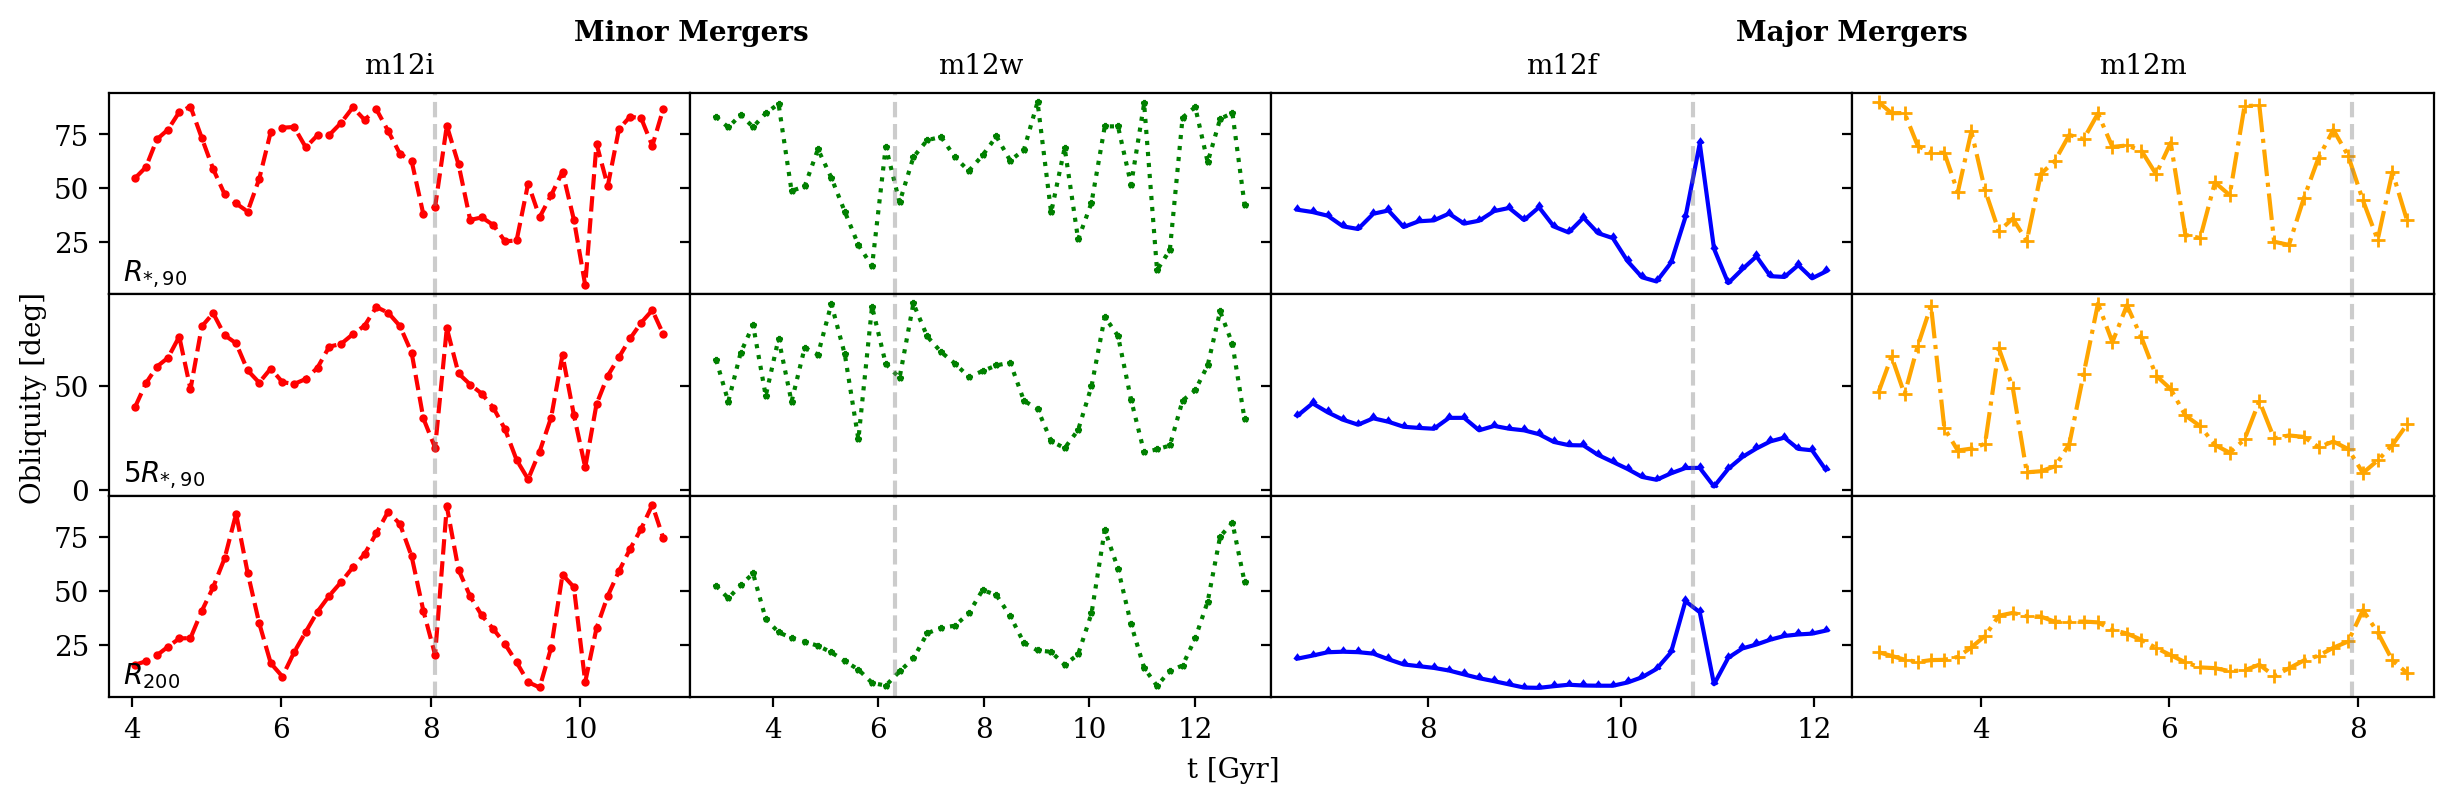

In [25]:
fig, axs = pl.subplots(3, 4, dpi=200, sharex='col', sharey='row', figsize=(15,4))

([disk_i, disk_m, disk_f, disk_w],
 [disk5_i, disk5_m, disk5_f, disk5_w],
 [vir_i, vir_m, vir_f, vir_w]) = axs

domain = np.arange(0, 13)

disk_f.plot(vfunc(m12f_data['snapshot']), m12f_data['disk'], ms=2, c='blue', marker=10, label='m12f')
disk_i.plot(vfunc(m12i_data['snapshot']), m12i_data['disk'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
disk_m.plot(vfunc(m12m_data['snapshot']), m12m_data['disk'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
disk_w.plot(vfunc(m12w_data['snapshot']), m12w_data['disk'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

disk5_f.plot(vfunc(m12f_data['snapshot']), m12f_data['5.disk'], ms=2, c='blue', marker=10, label='m12f')
disk5_i.plot(vfunc(m12i_data['snapshot']), m12i_data['5.disk'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
disk5_m.plot(vfunc(m12m_data['snapshot']), m12m_data['5.disk'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
disk5_w.plot(vfunc(m12w_data['snapshot']), m12w_data['5.disk'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

vir_f.plot(vfunc(m12f_data['snapshot']), m12f_data['virial'], ms=2, c='blue', marker=10, label='m12f')
vir_i.plot(vfunc(m12i_data['snapshot']), m12i_data['virial'], ms=2, c='red', marker='o', label='m12i', ls='dashed')
vir_m.plot(vfunc(m12m_data['snapshot']), m12m_data['virial'], ms=2, c='green', marker='*', label='m12m', ls='dotted')
vir_w.plot(vfunc(m12w_data['snapshot']), m12w_data['virial'], ms=5, c='orange', marker='+', label='m12w', ls='dashdot')

fig.text(0.5, .025, 't [Gyr]', ha = 'center')
fig.text(0.1, .5, 'Obliquity [deg]', ha = 'center', rotation = 90, va = 'center')

disk_f.axvline(pericenter['m12f']['peri.t'], alpha=.4, c='gray', ls='dashed')
disk5_f.axvline(pericenter['m12f']['peri.t'], alpha=.4, c='gray', ls='dashed')
vir_f.axvline(pericenter['m12f']['peri.t'], alpha=.4, c='gray', ls='dashed')

disk_i.axvline(pericenter['m12i']['peri.t'], alpha=.4, c='gray', ls='dashed')
disk5_i.axvline(pericenter['m12i']['peri.t'], alpha=.4, c='gray', ls='dashed')
vir_i.axvline(pericenter['m12i']['peri.t'], alpha=.4, c='gray', ls='dashed')

disk_m.axvline(pericenter['m12m']['peri.t'], alpha=.4, c='gray', ls='dashed')
disk5_m.axvline(pericenter['m12m']['peri.t'], alpha=.4, c='gray', ls='dashed')
vir_m.axvline(pericenter['m12m']['peri.t'], alpha=.4, c='gray', ls='dashed')

disk_w.axvline(pericenter['m12w']['peri.t'], alpha=.4, c='gray', ls='dashed')
disk5_w.axvline(pericenter['m12w']['peri.t'], alpha=.4, c='gray', ls='dashed')
vir_w.axvline(pericenter['m12w']['peri.t'], alpha=.4, c='gray', ls='dashed')

fig.text(.8, 1.3, 'Minor Mergers', transform = disk_i.transAxes, weight = 'bold', va = 'center')
fig.text(.8, 1.3, 'Major Mergers', transform = disk_f.transAxes, weight = 'bold', va = 'center')

fig.text(.5, 1.1, 'm12f', transform = disk_f.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12i', transform = disk_i.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12m', transform = disk_w.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12w', transform = disk_m.transAxes, ha = 'center')

disk_i.text(.025, .07, '$R_{*,90}$', transform = disk_i.transAxes)
disk5_i.text(.025, .07, '$5R_{*,90}$', transform = disk5_i.transAxes)
vir_i.text(.025, .07, '$R_{200}$', transform = vir_i.transAxes)

fig.subplots_adjust(hspace = 0, wspace = 0)
pl.savefig('_plot_lmcAlignments_z.pdf')
pl.show()

In [26]:
from astropy.io.misc.hdf5 import read_table_hdf5

In [27]:
f_lmc = read_table_hdf5('lmc_positions_m12f_res7100.h5')
i_lmc = read_table_hdf5('lmc_positions_m12i_res7100.h5')
m_lmc = read_table_hdf5('lmc_positions_m12m_res7100.h5')
w_lmc = read_table_hdf5('lmc_positions_m12w_res7100.h5')

f_dist = np.sqrt(f_lmc['position'][:, 0]**2 + f_lmc['position'][:, 1]**2 + f_lmc['position'][:, 2]**2)[np.in1d(f_lmc['snapshot'], m12f_data['snapshot'])]
i_dist = np.sqrt(i_lmc['position'][:, 0]**2 + i_lmc['position'][:, 1]**2 + i_lmc['position'][:, 2]**2)[np.in1d(i_lmc['snapshot'], m12i_data['snapshot'])]
w_dist = np.sqrt(w_lmc['position'][:, 0]**2 + w_lmc['position'][:, 1]**2 + w_lmc['position'][:, 2]**2)[np.in1d(w_lmc['snapshot'], m12w_data['snapshot'])]
m_dist = np.sqrt(m_lmc['position'][:, 0]**2 + m_lmc['position'][:, 1]**2 + m_lmc['position'][:, 2]**2)[np.in1d(m_lmc['snapshot'], m12m_data['snapshot'])]

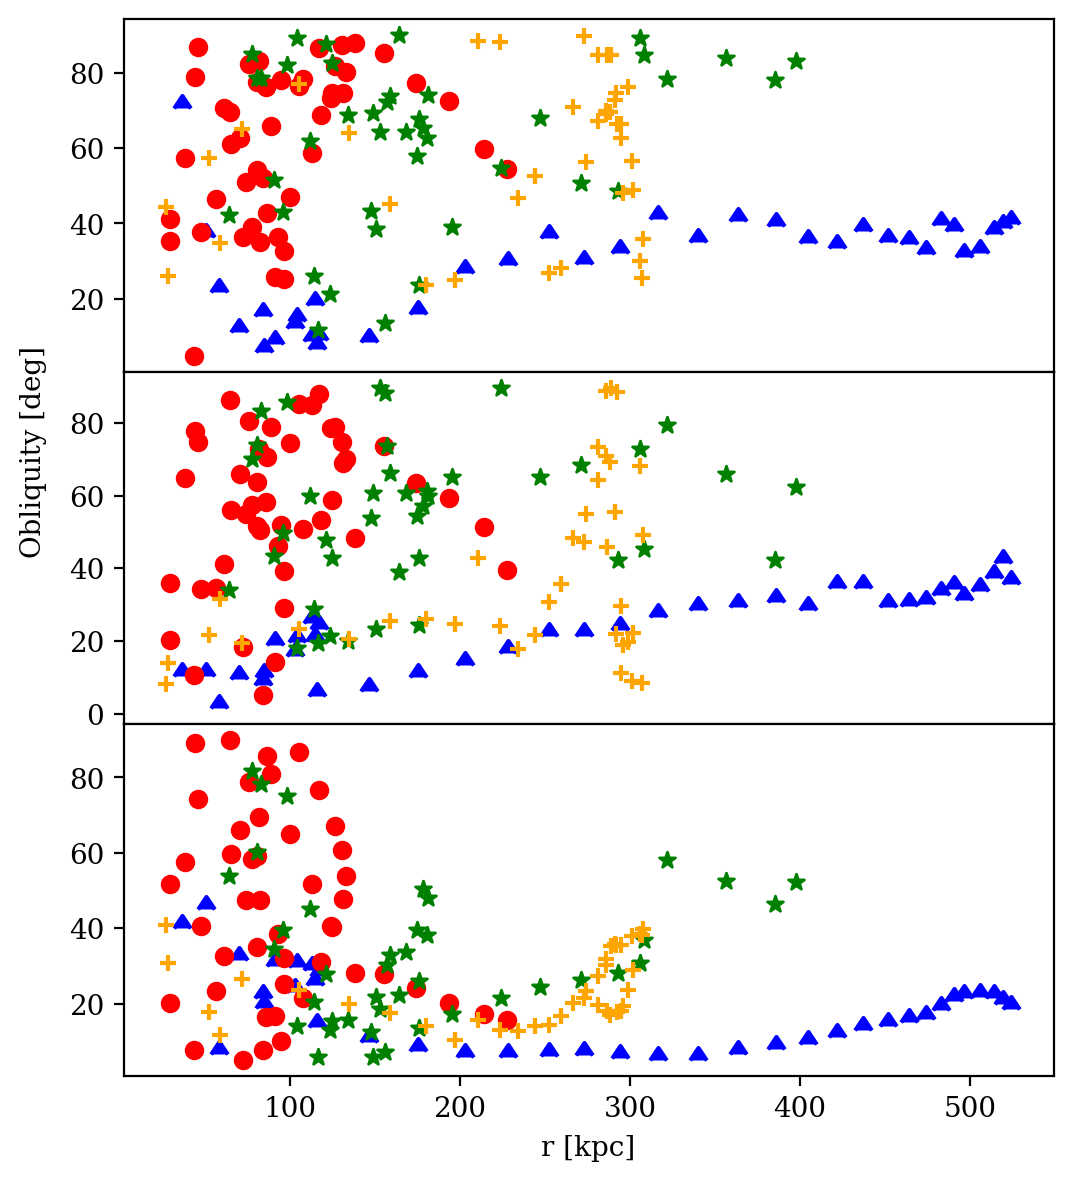

In [8]:
fig, axs = pl.subplots(3, dpi=200, sharex=True, figsize=(6,7))

(rs90, rs90_5, r_vir) = axs

domain = np.arange(0, 13)

rs90.scatter(f_dist, m12f_data['disk'], c='blue', marker=10, label='m12f')
rs90.scatter(i_dist, m12i_data['disk'], c='red', marker='o', label='m12i')
rs90.scatter(m_dist, m12m_data['disk'], c='green', marker='*', label='m12m')
rs90.scatter(w_dist, m12w_data['disk'], c='orange', marker='+', label='m12w')

rs90_5.scatter(f_dist, m12f_data['5.disk'], c='blue', marker=10, label='m12f')
rs90_5.scatter(i_dist, m12i_data['5.disk'], c='red', marker='o', label='m12i')
rs90_5.scatter(m_dist, m12m_data['5.disk'], c='green', marker='*', label='m12m')
rs90_5.scatter(w_dist, m12w_data['5.disk'], c='orange', marker='+', label='m12w')

r_vir.scatter(f_dist, m12f_data['virial'], c='blue', marker=10, label='m12f')
r_vir.scatter(i_dist, m12i_data['virial'], c='red', marker='o', label='m12i')
r_vir.scatter(m_dist, m12m_data['virial'], c='green', marker='*', label='m12m')
r_vir.scatter(w_dist, m12w_data['virial'], c='orange', marker='+', label='m12w')

r_vir.set_xlabel('r [kpc]')
fig.text(0.05, .5, 'Obliquity [deg]', ha = 'center', rotation = 90)

fig.subplots_adjust(hspace = 0)
pl.show()

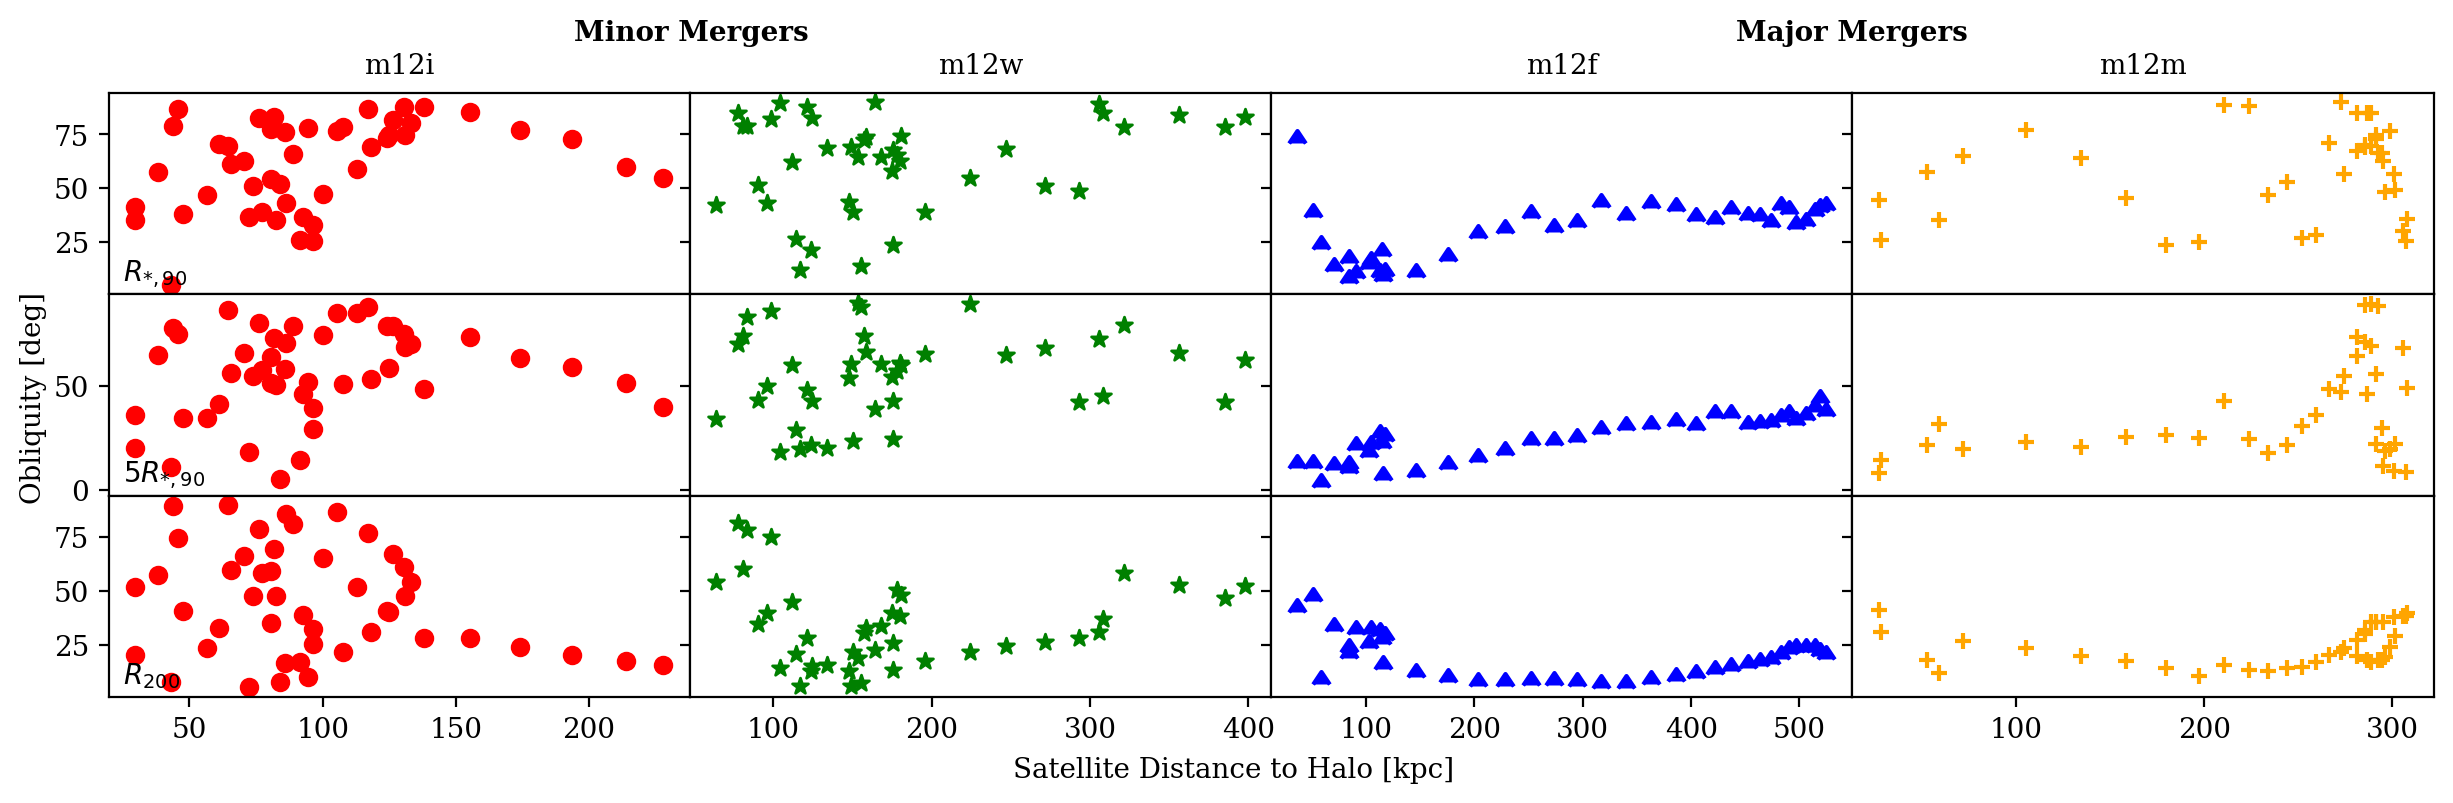

In [33]:
fig, axs = pl.subplots(3, 4, dpi=200, sharex='col', sharey='row', figsize=(15,4))

([disk_i, disk_m, disk_f, disk_w],
 [disk5_i, disk5_m, disk5_f, disk5_w],
 [vir_i, vir_m, vir_f, vir_w]) = axs

disk_f.scatter(f_dist, m12f_data['disk'], c='blue', marker=10, label='m12f')
disk_i.scatter(i_dist, m12i_data['disk'], c='red', marker='o', label='m12i')
disk_m.scatter(m_dist, m12m_data['disk'], c='green', marker='*', label='m12m')
disk_w.scatter(w_dist, m12w_data['disk'], c='orange', marker='+', label='m12w')

disk5_f.scatter(f_dist, m12f_data['5.disk'], c='blue', marker=10, label='m12f')
disk5_i.scatter(i_dist, m12i_data['5.disk'], c='red', marker='o', label='m12i')
disk5_m.scatter(m_dist, m12m_data['5.disk'], c='green', marker='*', label='m12m')
disk5_w.scatter(w_dist, m12w_data['5.disk'], c='orange', marker='+', label='m12w')

vir_f.scatter(f_dist, m12f_data['virial'], c='blue', marker=10, label='m12f')
vir_i.scatter(i_dist, m12i_data['virial'], c='red', marker='o', label='m12i')
vir_m.scatter(m_dist, m12m_data['virial'], c='green', marker='*', label='m12m')
vir_w.scatter(w_dist, m12w_data['virial'], c='orange', marker='+', label='m12w')

fig.text(0.5, .025, 'Satellite Distance to Halo [kpc]', ha = 'center')
fig.text(0.1, .5, 'Obliquity [deg]', ha = 'center', rotation = 90, va = 'center')

fig.text(.8, 1.3, 'Minor Mergers', transform = disk_i.transAxes, weight = 'bold', va = 'center')
fig.text(.8, 1.3, 'Major Mergers', transform = disk_f.transAxes, weight = 'bold', va = 'center')

fig.text(.5, 1.1, 'm12f', transform = disk_f.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12i', transform = disk_i.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12m', transform = disk_w.transAxes, ha = 'center')
fig.text(.5, 1.1, 'm12w', transform = disk_m.transAxes, ha = 'center')

disk_i.text(.025, .07, '$R_{*,90}$', transform = disk_i.transAxes)
disk5_i.text(.025, .07, '$5R_{*,90}$', transform = disk5_i.transAxes)
vir_i.text(.025, .07, '$R_{200}$', transform = vir_i.transAxes)

fig.subplots_adjust(hspace = 0, wspace = 0)
pl.savefig('_plot_lmcAlignments_distance_z.pdf')
pl.show()